In [2]:
import pandas as pd

df = pd.read_csv('../data/sales.csv')
df.dropna(subset=['price'], inplace=True)

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [4]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

# 1. Decision Tree model with one feature

<font color='red'>Assignment:</font> Build a pipeline to predict **price** with **cost** using **DecisionTreeRegressor**.

In [5]:
y_train = train_raw['price'].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
y_test = test_raw['price'].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))


class Numerical_Transformer(object):
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        self.mean['cost'] = df['cost'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

steps = [('ntf', Numerical_Transformer()),
         ('dtr', DecisionTreeRegressor(max_depth=3))]

model = Pipeline(steps)

model.fit(train_raw, y_train)

Pipeline(steps=[('ntf',
                 <__main__.Numerical_Transformer object at 0x000001ABF28B0CD0>),
                ('dtr', DecisionTreeRegressor(max_depth=3))])

<font color='red'>Assignment:</font> Calculate train/test scores of this model.

In [7]:
y_train_pred = model.predict(train_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = model.predict(test_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.06e+05
train MSE: 2.70e+10
train R2: 0.367
train MAE: 1.28e+05
train MSE: 5.24e+10
train R2: 0.392


<font color='red'>Assignment:</font> Plot the predcited **price** against **cost**.

In [8]:
import matplotlib.pylab as plt
%matplotlib inline

import numpy as np

def plot_cost_price(cost, price, model):
    cost_raw = cost.map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
    plt.scatter(cost_raw, price, alpha=0.3)
    #x = np.linspace(0, 1e6)
    #y = model.predict(x.reshape(-1,1))
    df = pd.DataFrame()
    x = np.linspace(0, 1e6)
    df['cost'] = x
    y = model.predict(df)
    plt.plot(x, y, color='r')
    plt.xlabel('cost')
    plt.ylabel('price')
    plt.xlim([0,1e6])
    plt.ylim([0,2e6])
    plt.show()

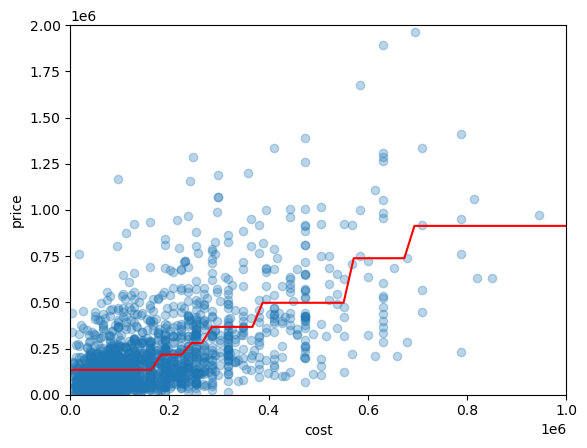

In [9]:
plot_cost_price(train_raw.cost, y_train, model)

<font color='red'>Question:</font> Does the decision tree model perform better than the linear regression model purely based on **cost**? Why is that?

In [10]:
from sklearn.linear_model import LinearRegression

steps = [('ntf', Numerical_Transformer()),
         ('lr', LinearRegression())]

model = Pipeline(steps)

model.fit(train_raw, y_train)
y_train_pred = model.predict(train_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = model.predict(test_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.15e+05
train MSE: 2.96e+10
train R2: 0.306
train MAE: 1.44e+05
train MSE: 5.62e+10
train R2: 0.348


In [12]:
# Decision tree model performs better than the linear regression model. That is because the decision tree algorithm is
# performed to minimize the cost function (sqaured root here)

<font color='red'>Question:</font> How does decision tree work? How is branch split?

In [13]:
# Decisoin tree is a flowchart-like tree sturcture. Each internal node denotes a test on an attribute, each branch represents 
# an outcome of the test, each leaf node represents a class label.
# The branch is split dependes on the outcome of a test.

# 2. Decision Tree model with multiple features

<font color='red'>Assignment:</font> Build a decision-tree pipeline to predict **price** with **cost**, **weight**, **height**, **width**, **depth**, and **volumn**.

In [11]:
def weight2num(x):
    """
    This function transform weight string to numerical value.
    """
    if type(x) == str: 
        y = x.split(" Ton ")    
        return float(y[0]) * 1000 + float(y[1].replace(' Kg',''))
    else:
        return x


class Numerical_Transformer(object):
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        self.mean['cost'] = df['cost'].mean()
        df['weight'] = X['weight'].map(weight2num)
        self.mean['weight'] = df['weight'].mean()
        df['height'] = X['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
        self.mean['height'] = df['height'].mean()
        df['width'] = X['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        self.mean['width'] = df['width'].mean()
        df['depth'] = X['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        self.mean['depth'] = df['depth'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        df['weight'] = X['weight'].map(weight2num)
        df['height'] = X['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
        df['width'] = X['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        df['depth'] = X['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)



In [12]:
from sklearn.preprocessing import StandardScaler

steps = [('ntf', Numerical_Transformer()),
         ('norm', StandardScaler()),
         ('dtr', DecisionTreeRegressor(max_depth=3))]

model = Pipeline(steps)

model.fit(train_raw, y_train)

Pipeline(steps=[('ntf',
                 <__main__.Numerical_Transformer object at 0x000001ABF63EF910>),
                ('norm', StandardScaler()),
                ('dtr', DecisionTreeRegressor(max_depth=3))])

<font color='red'>Assignment:</font> Calculate the train/test scores.

In [13]:
model.fit(train_raw, y_train)
y_train_pred = model.predict(train_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = model.predict(test_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.05e+05
train MSE: 2.62e+10
train R2: 0.386
train MAE: 1.33e+05
train MSE: 5.67e+10
train R2: 0.342


<font color='red'>Assignment:</font> Plot the feature importance in a bar chart.

In [14]:
model[2].feature_importances_

array([0.93305642, 0.06694358, 0.        , 0.        , 0.        ])

<font color='red'>Question:</font> How the feature importance values are calculated?

In [ ]:
# Feature importance of a feature in a decition tree is the sum of node importance of all nodes using that feature as branching 
# criteria. The node importance for a node in the regression decision tree is defined as the reduction of mean squared error 
# after appling the splitting cirteria in the node.

<font color='red'>Assignment:</font> Retrain the model and rerun the above steps to see the changes in the results.

In [15]:
class Numerical_Transformer1(object):
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        self.mean['cost'] = df['cost'].mean()
        df['weight'] = X['weight'].map(weight2num)
        self.mean['weight'] = df['weight'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        df['weight'] = X['weight'].map(weight2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)



steps = [('ntf', Numerical_Transformer1()),
         ('norm', StandardScaler()),
         ('dtr', DecisionTreeRegressor(max_depth=3, random_state = 109))]

model = Pipeline(steps)


model.fit(train_raw, y_train)

model.fit(train_raw, y_train)
y_train_pred = model.predict(train_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = model.predict(test_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

model[2].feature_importances_

train MAE: 1.05e+05
train MSE: 2.62e+10
train R2: 0.386
train MAE: 1.33e+05
train MSE: 5.67e+10
train R2: 0.342


array([0.93305642, 0.06694358])

<font color='red'>Question:</font> Do you see any problems with this model? Why is that?

In [ ]:
# NO

# 3. Hyperparameter tuning

<font color='red'>Assignment:</font> Tune hyperparameters with k-fold cross validation to optimize model performance.

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

scorer_method = make_scorer(mean_squared_error, greater_is_better=False)

steps = [('ntf', Numerical_Transformer()),
         ('norm', StandardScaler()),
         ('dtr', DecisionTreeRegressor())]

model = Pipeline(steps)

max_depths = range(1, 10)
min_samples_splits = range(2, 10)

grid = dict()
#grid['lr__alpha'] = lasso_alphas 
grid['dtr__max_depth'] = max_depths 
grid['dtr__min_samples_split'] = min_samples_splits 


search = GridSearchCV(model, param_grid = grid, scoring = scorer_method, \
                      cv = kf, n_jobs = -1, error_score = np.NaN).fit(train_raw, y_train)


In [57]:
print('MAE: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: -28770867293.87294
Config: {'dtr__max_depth': 3, 'dtr__min_samples_split': 2}


In [58]:
y_train_pred = search.predict(train_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

y_test_pred = search.predict(test_raw)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

train MAE: 1.05e+05
train MSE: 2.62e+10
train R2: 0.386
train MAE: 1.33e+05
train MSE: 5.67e+10
train R2: 0.342


<font color='red'>Question:</font> What are the hyper parameters which can effetively affect model performance? How do they affect the performance respectively?

In [ ]:
# One hyper parameters is max_depth, it controls the complexity of the model
# The other is min_samples_split, it can controls the rigidity of the fitting
# Both must be chosen carefully to prevent under fitting or over-fitting.